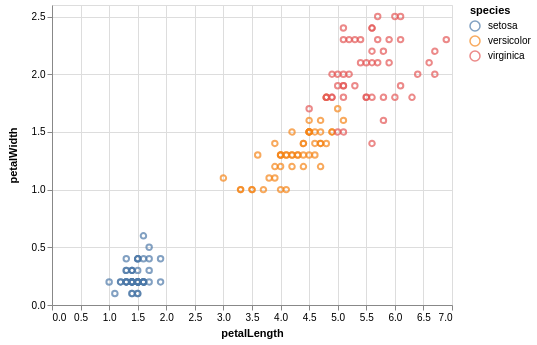

In [71]:
%matplotlib inline
import matplotlib
import altair as alt
from vega_datasets import data
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
alt.data_transformers.enable('json')
# Set global figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [2]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


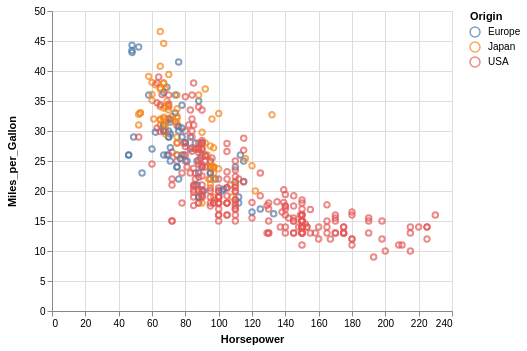

In [3]:
cars = data.cars()
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

In [4]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [8]:
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


In [5]:
alt.Chart(data).mark_point()

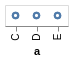

In [6]:
alt.Chart(data).mark_point().encode(
    x='a',
)

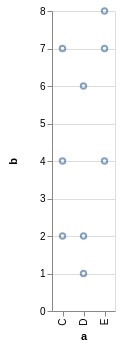

In [7]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='b'
)

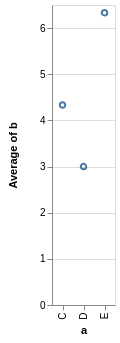

In [9]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

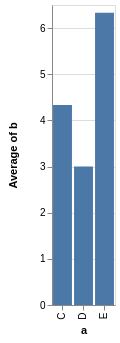

In [10]:
alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

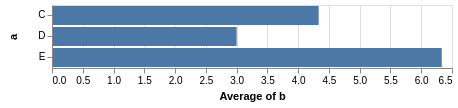

In [11]:
alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

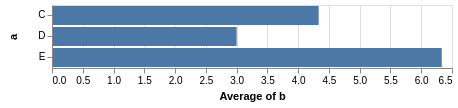

In [12]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a', type='nominal'),
    alt.X('b', type='quantitative', aggregate='average')
)

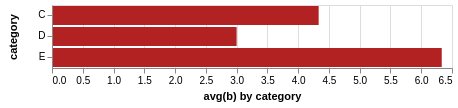

In [13]:
alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a', axis=alt.Axis(title='category')),
    alt.X('average(b)', axis=alt.Axis(title='avg(b) by category'))
)

In [31]:
df = pd.read_csv('KOHSIDNE4_weather_cleaned.csv', parse_dates=['Time'], index_col=[0])

In [32]:
df.head()

,TemperatureF,Station
Time,,
2017-05-01 00:04:00,69.8,KOHSIDNE4
2017-05-01 00:09:00,69.6,KOHSIDNE4
2017-05-01 00:15:00,69.0,KOHSIDNE4
2017-05-01 00:21:00,68.6,KOHSIDNE4
2017-05-01 00:26:00,68.6,KOHSIDNE4


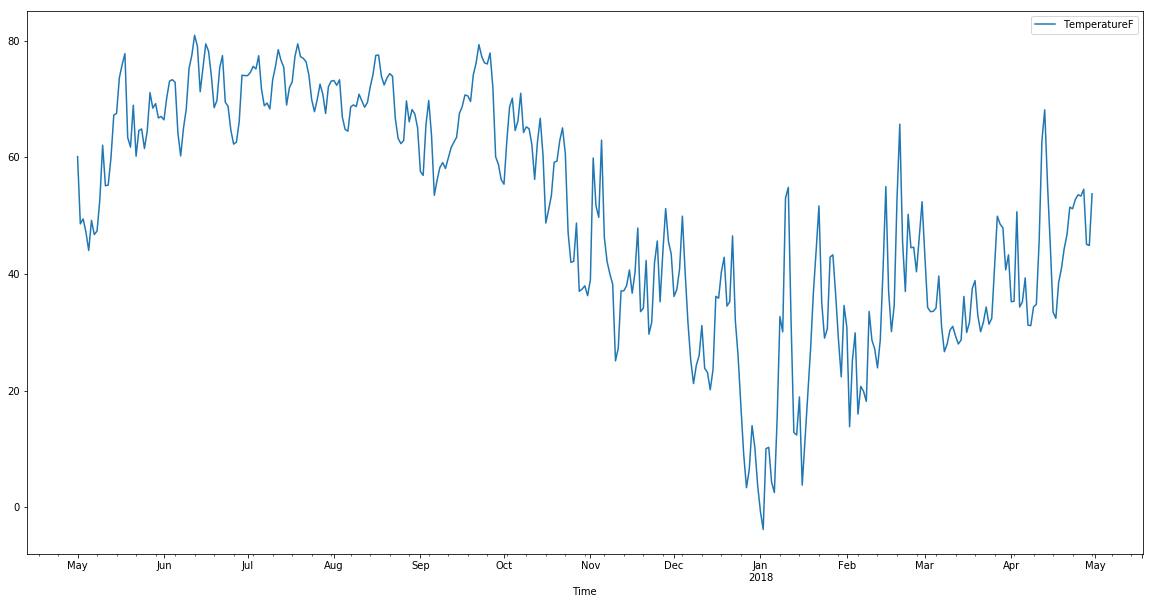

In [33]:
df.resample('D').mean().plot()

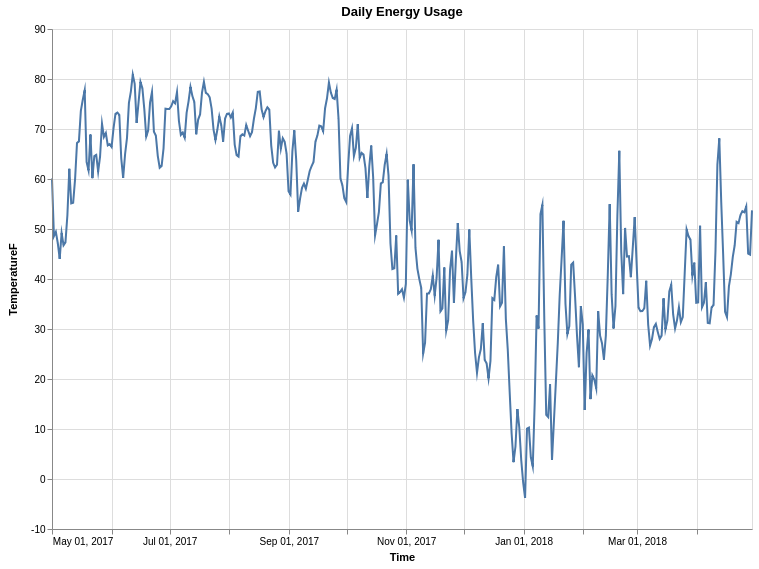

In [64]:
alt.Chart(df.resample('D').mean().reset_index(), height=500, width=700, title='Daily Energy Usage') \
    .mark_line().encode(
        x='Time',
        y='TemperatureF'
)

In [66]:
# Building a Python list using list comprehension syntax
month_list = [month[:7] for month in df.resample('M').sum().index.astype(str)]

In [67]:
month_list

['2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04']

### Using ipywidgets

In [88]:
label_all = widgets.HTML(
    value="<b>All Data:</b>"
)
display(label_all)

@interact
def all(interval=['H','D','W'], aggfunc=['mean','none']):
    if aggfunc == 'mean':
        chart =  alt.Chart(df.resample(interval).mean().reset_index(), height=500, width=1000, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    else:
        chart =  alt.Chart(df.reset_index(), height=500, width=1000, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    return chart


label_bymonth = widgets.HTML(
    value="<b>By Month:</b>"
)
display(label_bymonth)
@interact
def byMonth(month=month_list, interval=['H','D','W'], aggfunc=['mean','none']):
    if aggfunc == 'mean':
        chart =  alt.Chart(df.loc[month].resample(interval).mean().reset_index(), height=500, width=900, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    else:
        chart =  alt.Chart(df.loc[month].reset_index(), height=500, width=900, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    return chart

HTML(value='<b>All Data:</b>')

interactive(children=(Dropdown(description='interval', options=('H', 'D', 'W'), value='H'), Dropdown(descripti…

HTML(value='<b>By Month:</b>')

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…